In [16]:
from __future__ import print_function
import requests
import json
import cv2
from time import time

start = time()

addr = 'http://localhost:5000'
test_url = addr + '/predict'

# prepare headers for http request
content_type = 'image/png'
headers = {'content-type': content_type}

img = cv2.imread('672220.png',cv2.IMREAD_UNCHANGED)
# encode image as jpeg

_, img_encoded = cv2.imencode('.png', img)

# send http request with image and receive response
response = requests.post(test_url, data=img_encoded.tostring(), headers=headers)
#response = requests.post(test_url, data={'encoded_image' : bytes(img_encoded)}, headers=headers)
# decode response
print(response.text)
#print(json.loads(response.text))

print(time()-start)

# expected output: {'answer': '672220'}

{"answer": "672220"}

3.109591484069824


In [2]:
## from __future__ import print_function
import requests
import json
import cv2
import base64
from time import time

start = time()

addr = 'http://localhost:5000'
test_url = addr + '/predict'

# prepare headers for http request
content_type = 'image/png'
headers = {'content-type': content_type}

with open("672220.png", "rb") as img_file:
    base64Encoded = base64.b64encode(img_file.read())
print(base64Encoded)



b'iVBORw0KGgoAAAANSUhEUgAAAHgAAAAoCAYAAAA16j4lAAAMgklEQVR42u1bC3CU1RXeXUISloQQ8n4sSTAkJNm8WAIJz/AISSaSUMcEkYhgS9XOCDodh2ptIyoPWwvaAlPEIipTCyPIq7WWWp22irYUKqWRMhUzWsNzwFIMSUh2+53l3PTm539tshsss3fmyya79+659373PO8fi8Vi8QRxU+PaDxMtB9gLuPnV723IkCGOhISE+enp6avGjBmzLT8/f09eXt7OkSNHfp+7WC2Ba9bIyMhYjc9sQBQQYfn/aj4RnMXkUn/3sGHDSmJiYlL6OwO73T4WhK4eN25cc3l5uUcNubm5dKDygUlAGdAIVNGZ6Kf4YYmJiXc7nc4N06ZN+3FdXd3S6urqOfHx8Qn8eSRQDjwEPAysBF4EHuX59LcVA9OABJZ1Qwm2Wa3Wt4Tqx8bGHsemvD1p0qSWoqKiMyCoHWR0Am3AKWA3sB596qdMmZIkEzZ+/HgPxngmTJjg0SJVRmZmJsn8FfAR8AnwG+AE0M3oBFqBHcAC1rjr2syZM7PKyspWFRcXH3K5XDRXD+bnmTp1ajfLujJ9+vS38fl9ID4OQ74BHAE+BPYBu4HfA5f4sJPsi2zRNOVyGwOsBz4Dunj8ZV4Pre12IPWGEYzNqYImHRAEDxo0yANyexGBjfKAaC+IvIkTJ3rfKykp8RQWFnrGjh3rmTx5siaR2PzrvpMIgNkW/qSVX/8I3AmEAfUAHbyTvOH0eTPgEnMHadMwj4M4aKYOFHAEB2A6rNRe/r5P+ZXW/zUglDXuCSbMrSZXas/w5x3AYeBbwK3Ar4GrkowGIHrACa6srKyaNWvW+1h4e0RERI8DHzVqlNkN04TQ5tLSUu/faiRERUW5paBho2J6tNkVwMfAOalfG5k/jI2mA0YHTU0+HSD5VfyOQ7ERMUGr9H0bVLYmmt+/qpQr9Xmd3+/mA2GX5p0E/EI6ILSGW/wYax

In [101]:
from __future__ import print_function
import requests
import json
import cv2
import base64
from time import time

start = time()

addr = 'http://localhost:5000'
test_url = addr + '/predict'

# prepare headers for http request
content_type = 'image/png'
headers = {'content-type': content_type}

response = requests.post(test_url, data=base64Encoded)
print(json.loads(response.text))
print(len(base64Encoded))
print(base64Encoded[-20:])

{'error': "unsupported operand type(s) for /: 'NoneType' and 'float'"}
1512
b'nnEAAAAASUVORK5CYII='


In [1]:
from __future__ import print_function
import requests
import json
import cv2
import base64
from time import time
import requests

base64Encoded = b"iVBORw0KGgoAAAANSUhEUgAAAHgAAAAoCAIAAAC6iKlyAAAL9klEQVR42u2aZ0xVzRaGP6+91yuKvWHvvfcOxoqKFcWGWLFr7C3e2KPGBrYQY+89IthRRMWCimDDggV713ufMMlk7uy9D4fyme8H68fJOfvMnj3zzlrvetc656+/ku2P2X//iD1//jw0NPT169d/x+S/f/8+ffr0hg0b/Pz8Ll68+P3796SdPywsjJl9fX1PnTr17du3+N5uF9AxMTH3798/f/789u3br1y5Et9nhISETJkypW7duvXq1evbt++0adP8/f1//fqVJPtnHpY0d+7cVq1aNWvWzMXFpWfPnsOHD/fx8Xn8+HHi5w8PD583b56Tk1PatGlz5cpVpkyZJk2azJgxIzIyMomBvn79+vz582vWrPnvWEuXLt2/Yi116tRZs2bt1KnT6tWrTU/4xYsXAwYMYHFa9OTOnbtr164nT57EB2089+fPn2fPnm2kmHHMjx8/AgIC3Nzc2Lw6ko88Aqyjo6PjPKcLFy6sWLGCSfLnz68t4Pjx42XLlmWn6vpTpkxZsGBBsH769GmSAc15uru758yZ0zbzFC5cOCgoSL0R38+cObPVeLzD09PThlOAIDzQsGHDSpUqVa5cuUqVKgSENgYKmjp1auPGjSW+RIwKt6urK8egcciHDx+Cg4PXr1/v7e3NGA1EOez9+/eDBw/Gn6y2wKns2bPn69evSQP07Nmzc+TIYQ/LZ8+e/cmTJ+KuCRMmxDkerHFqALVim3bt2qmoEVLqAGJo4sSJ8tsGDRo0jLU6derwXl4fOXIkkKk3tmjRwp5c1adPnzi3wLnan29sAU1Y4arq1GnSpFm0aNG9e/dmzpzp6OioPXjIkCHcxQB5JVWqVFzkAAhD1rR37171LrzVNKeRMHv37q2iDIIadaxatUp+27RpUwJIAPru3btNmzZB1vLbc+fOqTuyRxRAC/JKpkyZ2NGbN2+4/urVKzxPDYItW7YkAdA3b9400lNgYKB45KxZs4zRBIHgquJjihQp2DMQqyAyJ0QvbxGzSfv48ePt27e9vLwa/b/hzhJoqODMmTPyq5YtW0ZERKiTfPnyhaCWA5ydnWUyQPbwkSRB/LE8IzMQYfAyX4mPGTJk4NTVyT9//rx8+XI5nr3YmdVtAX3o0CEjbzg4OIhszvY6dOig+Xu1atU0B9fswYMHI0aMkGOIdPkVzsgmR40aBe0KF5YGR0ugSRudO3cW17kdXzY+BXlHlpaHtGPHDvnVs2fPkE+4OVpl7Nix2u7I/MWKFZMf8WXj5PB+3rx55ZglS5YkFugDBw4Q3cb4IhGTBHCcSZMmabSLy8uPly9fNs759u3byZMnq3eJ3I0rHTt2bPTo0SK51a5du3379hJoliGAJoTXrFkjxiAtcGdTlofix40bJ2/v3r27KTGiprStjRkzRrozpGGqplApbdq0kbcUL148sUDjs126dJEPxmSsFSpUiM14eHioq8yWLZv60SqmtLsoMTgzDpXE1bx5cwEir+xZIoXwEEDv27ePJckESKowfQT8o97OsRFJxmGoTw1o9iXfd+vWzSpRaxkVPkwU0DjL5s2bNfikcQCaRsYF4qw28RFoQR3Wq1cv9PKgQYNwTzYglMPu3bsHDhwokapatSqv8CPBTuqT8EFupk9BPg8dOlTeXqtWLVOGYSptU2pEIsNNJ4+KimKF6l2LFy9OrLxDKqjRZMPSp0+vrhIzjTvYM0+ePJpIwrPYs5AK6GXqOkZ27NhRRYrXGzduSObF6tevz2xWxwldyJHgYur7Kh0b7fDhw6aTQ5tFixZVR1r5fvwqw1u3bqkBJWE1+oJ2Hvv379emwiUJfDXXo2rwVkEXEB9sQCWNNmCwWuyJ3AjJyIviSkxMjFXfQzq+GMxZGodpmkozq6qSybUbYTbQf/ToUQKBRpldu3Zt2LBh8L2NGsnK8D7NyxYuXKiplFKlSgmJhpDAl3m/a9cuUb5LmMR1HB/eUFHGVO2oVf+qO/Patm1b4xjb67cqpqAObaToSRQpUiQhQPMYAhO/wHmREzg12tO4GhgcYrXilm3bton8TnaioqV+KV++vKxlChYsWD/W4FOBHW9kg0UiVb16dcEekg1EEWja/bC6nTSrjbl69WqcxQsrJ4siOleuXEmu5rScnJxYuel4sLbR1bMEGsZgXmKEeZldNi6Mj8maNSullJFehHl7e2/cuBGtRqpEpQmhzZqQ+mQzUEYsimobLGQRT3WuZUJeOVEVOxtAq90onsgrCUAbc/ToUdtAs7B06dLZGb7Co230C82BRu0uWLCAuoivKJolI4OXVqRIc3V1tdInRsuSJQu8hldSiZQsWVIgsnXrVrmAnTt3atqOkZKgxRUroCkdUYHS90Wxo3n0y5cvp0+fnrDevTF84cA4O9TmQKPJpfTBYcUb1ALF2927d1u3bm26gho1atjo2GlrzZgxI+qQEgtHIGJI3OpafX19tWqFV9moE1esOJoktmLFCgk0p0I08AqyPXr0YJGmHGhl1OukB3d397lz51Jh+vv7I4qMMZ1A1bF27Vq1IyFMKiTYjQQl0qNWzhDdankaX08BesikX79+zs7OZcqUEd1RCbRsFbFzwdGi1yPt06dPrI2aGC/BLdg/vpbgX52oVHEsDRkkJnnb6GEJBHrq1KlG6YMCkWrEz88vX758xsXBttS1VB9gAS4oFkqeI0eOkEzQ4yQ02XKy3zg/+B1eKlCgQIkSJSpUqFCzZk0OgO39J9ZEacN67NH7srZycHCwPcZUR1Miqf2cxOpoQDEmPbWkRsB6eXkZNV/+/Pnxgvv37xt9QfSpRXphGL7GI3D/nDlzQjhctx+m+J4TNMXZjBs3bt26dQEBAaK7goqwfSOy3dgemTNnjuBSkcCELV26NIFAT5s2zUhkxiYWxGds51s9iYDAzRkDpiRDMV5r0ZUuXbpcuXJQNs4Ld+F3VlrK1IhCajZUPwfJJDxOpk1jr8PT09P2bEY/ffjwISErHEINiIT3Ooh3Nqw9+M6dO1rvmNxirBitytZJkyYJd6ZIkePJMMbBCC/ZORIFC2cAZZM2iQA4RGyVVw4D6Y1DEdHh4eEsCSmJLhJtaBcXF/FrS9++fY1Pgd9M8cX9xRviTK1ZEDPLli0ThMkaZL8BFZjw7h2x37t3b01FkrU17CBHbZUoMNMKc8+ePcAkpItUJrz/8OGD6bJIEqoQFj8burm5SSlNzhS/BiAE5V2BgYGU2o1jzcPDgzFisKg27QRaFU4qJ6DNeaIoAtXu8fLlyxMONGR04sQJUFNZGFo4ffq0HBAcHNy1a1dtlegq4zMuXbpEFOMCnJwqZnbv3m21LA5V09FCaPfs2VM0Udu0aUO9g8OiNYnoL1++sLb+/fsLrQ2IDWKN97169TL9ud2KOlinZDZADwsLw6UIMqok4cWIRZnSKQIS+wsLUonyjOhTcxQkiBdzBqgO5KTWJgURnoowwJsYEBQU9OrVq7179+KSYomqkoFJbCxr1qxZmo4WPLt48eJWrVqJSg+4OT+QRerJ6hxhB6FxRbgz3yLIxJwHDx6UwglTf+iRJlKcmpnJE3CX+B+AyAEy0NmU+oNkwrt3VBChoaG4idb/NDWSA/UY4+3JWuPHj7e9LOpSI9BcZ2Pity6BaSODgSzoS9LAJ1TNo2WIRBrOlJR/oEHJrVq1ynY1hQfNnj27YsWKRjGvGR6BZ8W5LNKOxI5pJdCoRlQ56rNly5aifpGdPN6I5om40qlTJ61bbfw1OcHm6Oho1a1O1F/ChJHQIQGCK0WsQd9oDHIUx/D582egsVoWEg0uI/VDI3Yymo+Pj6lHC6xDQkKoXeFxIoPimCTJAQO9aGpzkQxp/GsLVMaZxQtQ3KJErAm6gLJJCWRIePVv+e+dsZN74MABhASKKjIyUvwViCAl+ZAowBQRRj1CHUg1LBty8TKcEcgEvhQaxhYuFhUVpSlOO/+riGuzThv4urq6MjMaRivxE2OJ+jepms0h9IiICOIabQDoSfKXUXIXin7Tpk1/x79Po6OjcXx0JEKWMqR9+/Zko3nz5iEwkvyfqIkFOtmSgU4GOhnoZEsGOhnoZEsG+h8KdLL9AfsfwOlVynE+HIUAAAAASUVORK5CYII="
test_url = 'http://localhost:5000/predict'

In [2]:
import numpy as np
from PIL import Image
from io import BytesIO
decoded = base64.b64decode(base64Encoded)
img_array = np.frombuffer(decoded, np.uint8)  
print(img_array.shape)
# decode image
img_array = cv2.imdecode(img_array, cv2.IMREAD_UNCHANGED)
print(img_array.shape)

(3119,)
(40, 120, 3)


In [3]:
import sys
from time import time
sys.path.insert(0, './법원')
from 법원.predictCaptcha import PredictCaptcha

start = time()

predictor = PredictCaptcha()  
predictor.generator.load_weights('./법원/generator_weights.h5')
predictor.solver.load_weights('./법원/solver_weights.h5')
answer = predictor.predict(img_array)

print(answer)
print(time() - start)

894010
3.1975793838500977


In [70]:
rgb_temp = []
alpha_temp = []
for i in range(40) :
    for j in range(120) :
        rgb_temp.append(img[i,j,:3])
        alpha_temp.append(img[i,j,3])
rgb_temp = np.array(rgb_temp)
alpha_temp = np.array(alpha_temp)

print(np.array(rgb_temp).shape)
print(np.array(alpha_temp).shape)

y = np.polyfit(rgb_temp,alpha_temp,10)

(4800, 3)
(4800,)


TypeError: expected 1D vector for x

In [124]:
# 훈련이미지 변환 ( 다운로드 된 이미지 )
img = cv2.imread('672220.png',cv2.IMREAD_UNCHANGED)
new_img = np.zeros((40,120), np.uint8)
for i in range(40) :
    for j in range(120) :
        for channel in range(4) :
            if img[i,j,channel] > 0 :
                if img[i,j,channel] > new_img[i,j] :
                    new_img[i,j] = img[i,j,channel]

In [111]:
# 예측 이미지 변환 ( 캡쳐 된 이미지 )

decoded = base64.b64decode(base64Encoded)
img_array = np.frombuffer(decoded, np.uint8)  
new_img = np.zeros((40,120), np.uint8)
for i in range(40) :
    for j in range(120) :
        for channel in range(3) :
            if img[i,j,channel] < 255 :
                new_img[i,j] = 255 
                break

In [107]:
np.mean(new_img[:,:,1] == new_img[:,:,2])

1.0

(40, 120)


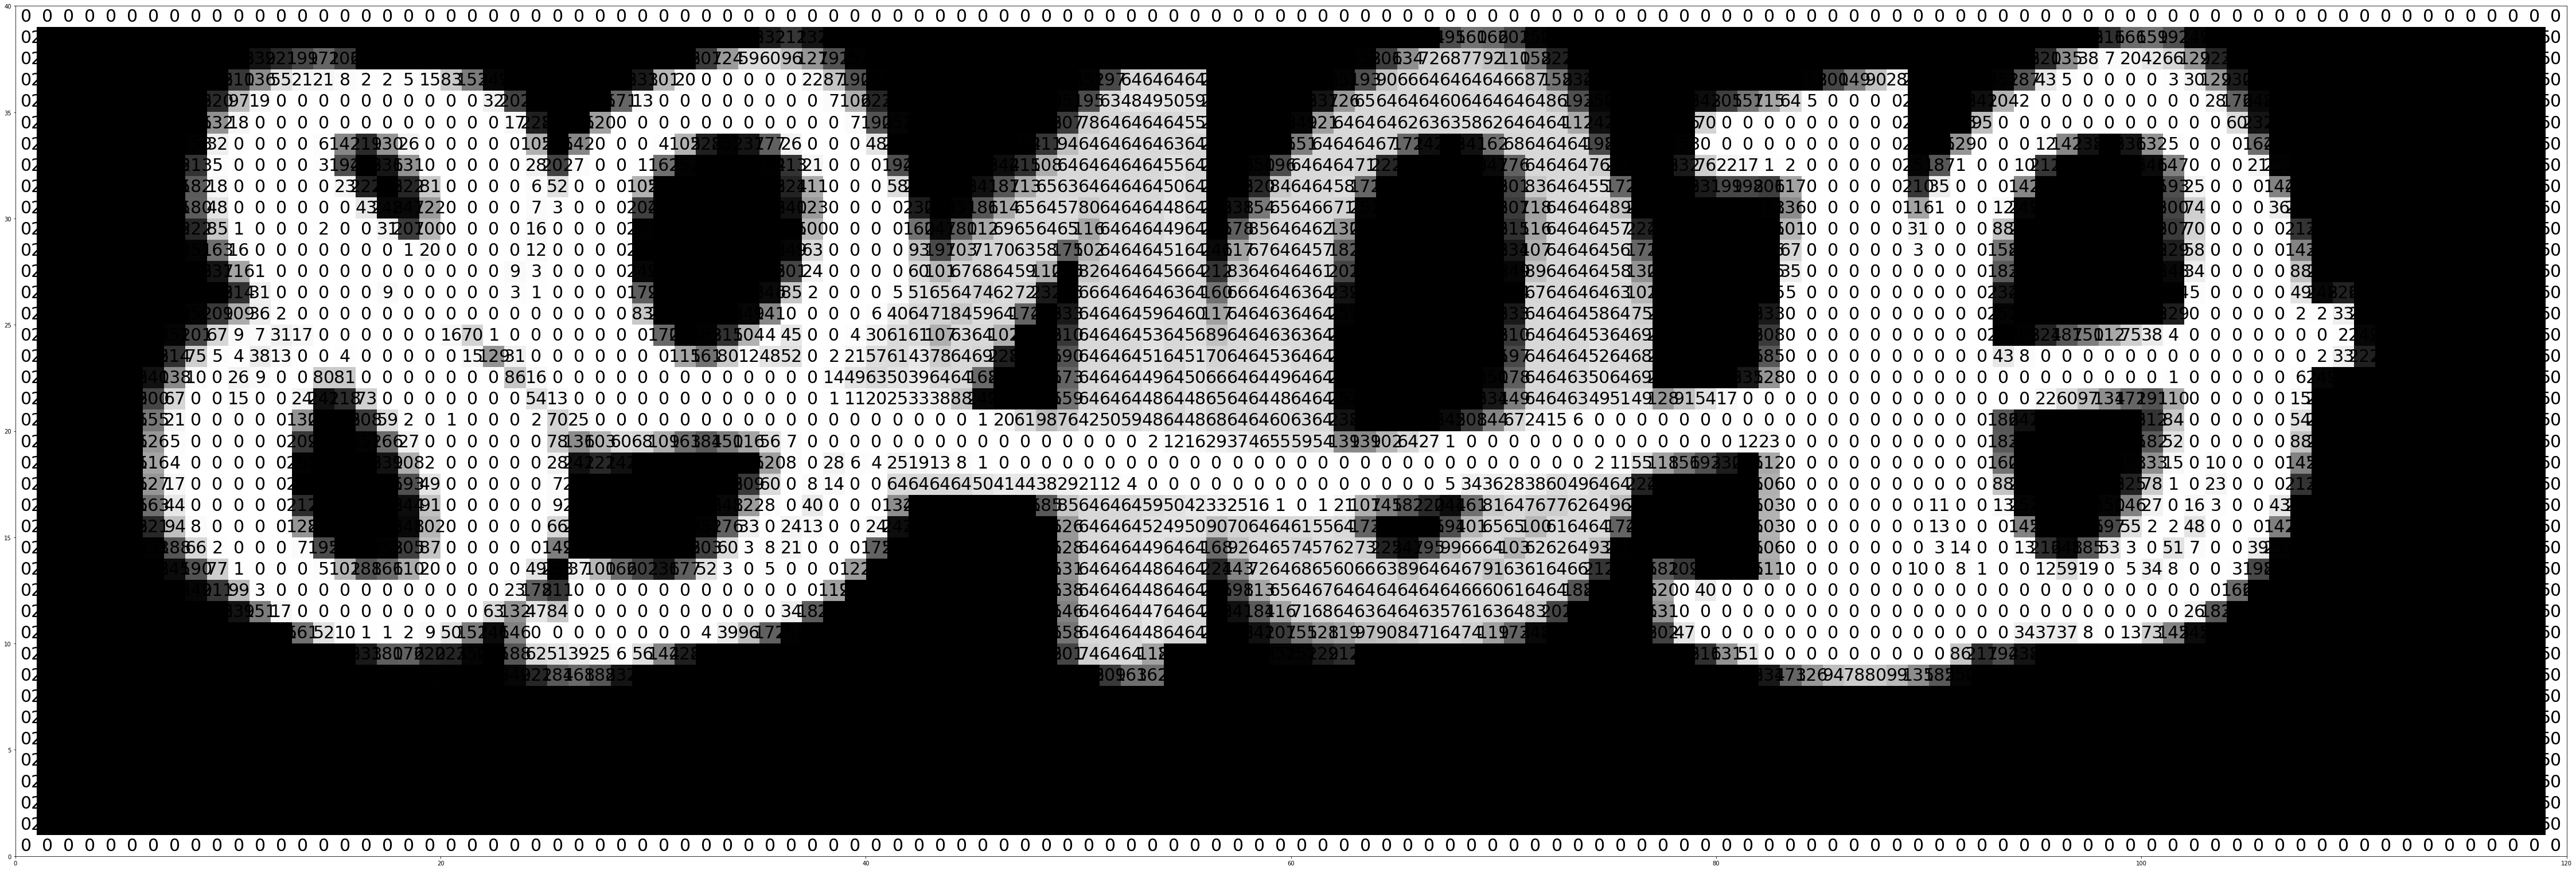

In [4]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

index = 5
image_grayscale = img_array[:,:,0]
image_grayscale = np.flip(image_grayscale,axis=0)

width = 120
heigth = 40
data = image_grayscale
print(data.shape)

# Limits for the extent
x_start = 0
x_end = 120
y_start = 0
y_end = 40

extent = [x_start, x_end, y_start, y_end]

# The normal figure
fig = plt.figure(figsize=(16*5, 12*5))

ax2 = fig.add_subplot(211)
im = ax2.imshow(data, extent=extent, origin='lower', interpolation='None', cmap='Greys')

# Add the text
jump_x = (x_end - x_start) / (2.0 * width)
jump_y = (y_end - y_start) / (2.0 * heigth)
x_positions = np.linspace(start=x_start, stop=x_end, num=width, endpoint=False)
y_positions = np.linspace(start=y_start, stop=y_end, num=heigth, endpoint=False)

for y_index, y in enumerate(y_positions):
    for x_index, x in enumerate(x_positions):
        label = data[y_index, x_index]
        text_x = x + jump_x
        text_y = y + jump_y
        ax2.text(text_x, text_y, label, color='black', ha='center', va='center',size = 30)
plt.show()

(40, 120)


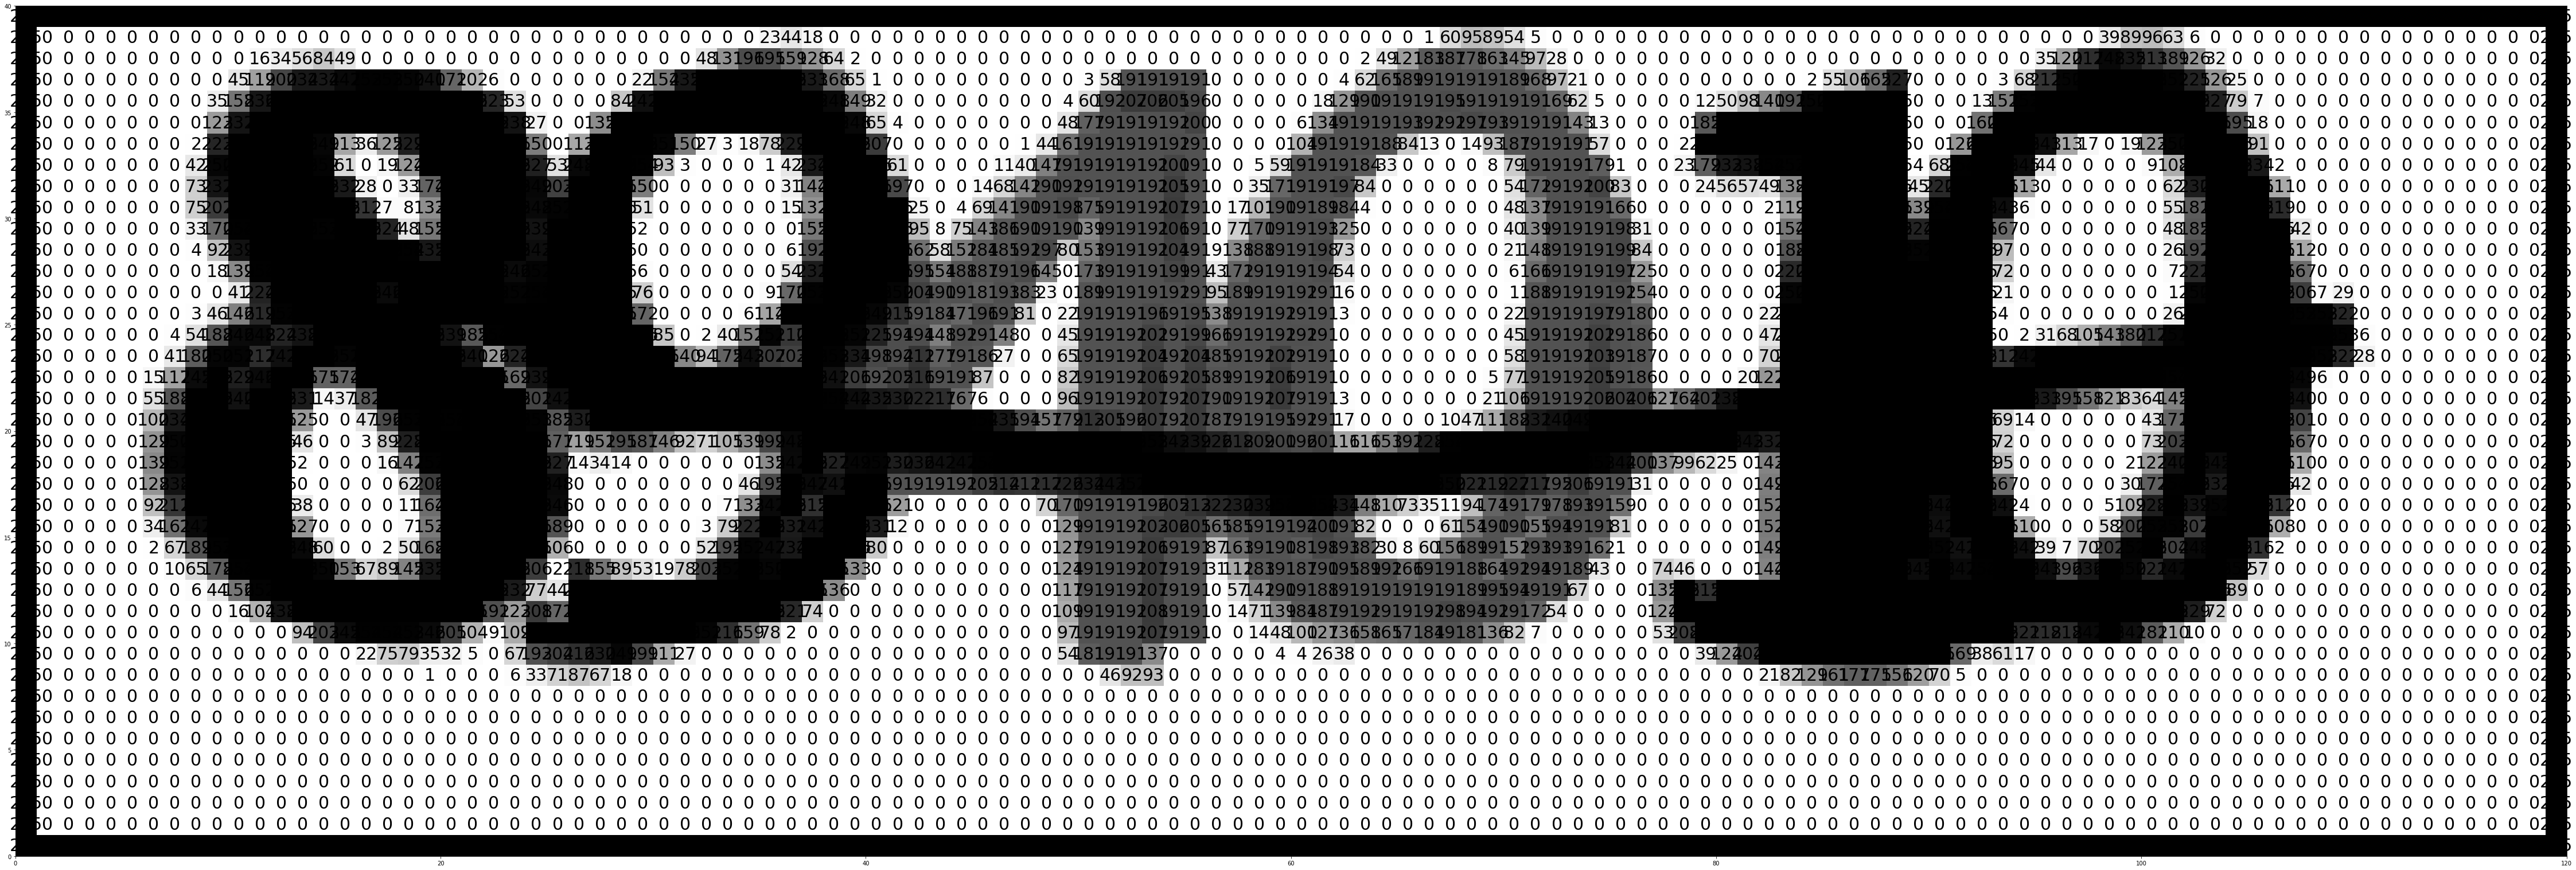

In [123]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

index = 5
image_grayscale = img_array[:,:,0]
image_grayscale = np.flip(image_grayscale,axis=0)

width = 120
heigth = 40
data = image_grayscale
print(data.shape)

# Limits for the extent
x_start = 0
x_end = 120
y_start = 0
y_end = 40

extent = [x_start, x_end, y_start, y_end]

# The normal figure
fig = plt.figure(figsize=(16*5, 12*5))

ax2 = fig.add_subplot(211)
im = ax2.imshow(data, extent=extent, origin='lower', interpolation='None', cmap='Greys')

# Add the text
jump_x = (x_end - x_start) / (2.0 * width)
jump_y = (y_end - y_start) / (2.0 * heigth)
x_positions = np.linspace(start=x_start, stop=x_end, num=width, endpoint=False)
y_positions = np.linspace(start=y_start, stop=y_end, num=heigth, endpoint=False)

for y_index, y in enumerate(y_positions):
    for x_index, x in enumerate(x_positions):
        label = data[y_index, x_index]
        text_x = x + jump_x
        text_y = y + jump_y
        ax2.text(text_x, text_y, label, color='black', ha='center', va='center',size = 30)
plt.show()

In [24]:
img = cv2.imread('민원24_다운로드.png',cv2.IMREAD_UNCHANGED)
print(img.shape)

(40, 100, 3)


(40, 100)


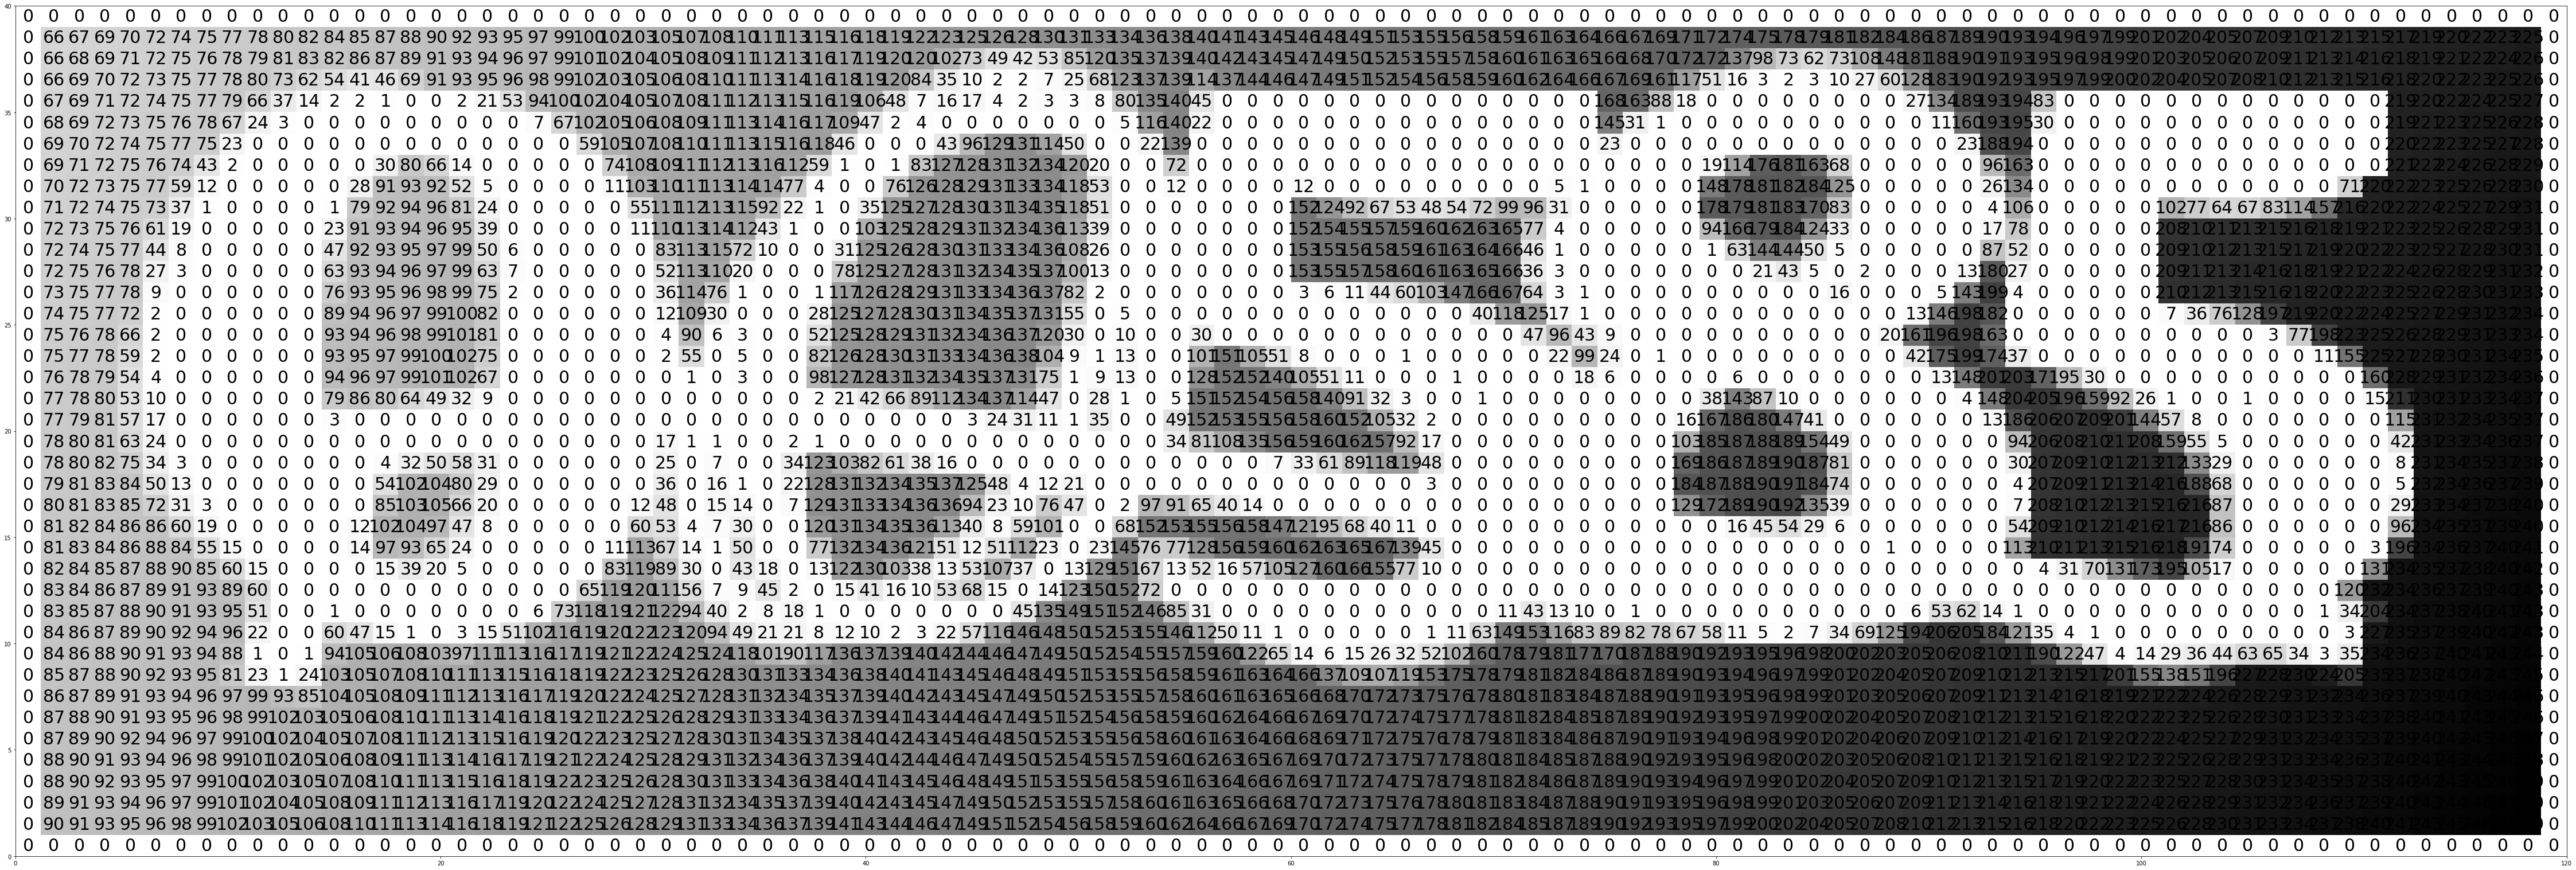

In [27]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

index = 5
image_grayscale = img[:,:,1]
image_grayscale = np.flip(image_grayscale,axis=0)

width = 100
heigth = 40
data = image_grayscale
print(data.shape)

# Limits for the extent
x_start = 0
x_end = 120
y_start = 0
y_end = 40

extent = [x_start, x_end, y_start, y_end]

# The normal figure
fig = plt.figure(figsize=(16*5, 12*5))

ax2 = fig.add_subplot(211)
im = ax2.imshow(data, extent=extent, origin='lower', interpolation='None', cmap='Greys')

# Add the text
jump_x = (x_end - x_start) / (2.0 * width)
jump_y = (y_end - y_start) / (2.0 * heigth)
x_positions = np.linspace(start=x_start, stop=x_end, num=width, endpoint=False)
y_positions = np.linspace(start=y_start, stop=y_end, num=heigth, endpoint=False)

for y_index, y in enumerate(y_positions):
    for x_index, x in enumerate(x_positions):
        label = data[y_index, x_index]
        text_x = x + jump_x
        text_y = y + jump_y
        ax2.text(text_x, text_y, label, color='black', ha='center', va='center',size = 30)
plt.show()

In [28]:
img = cv2.imread('민원24_캡쳐.png',cv2.IMREAD_UNCHANGED)
print(img.shape)

(40, 100, 3)


(40, 100)


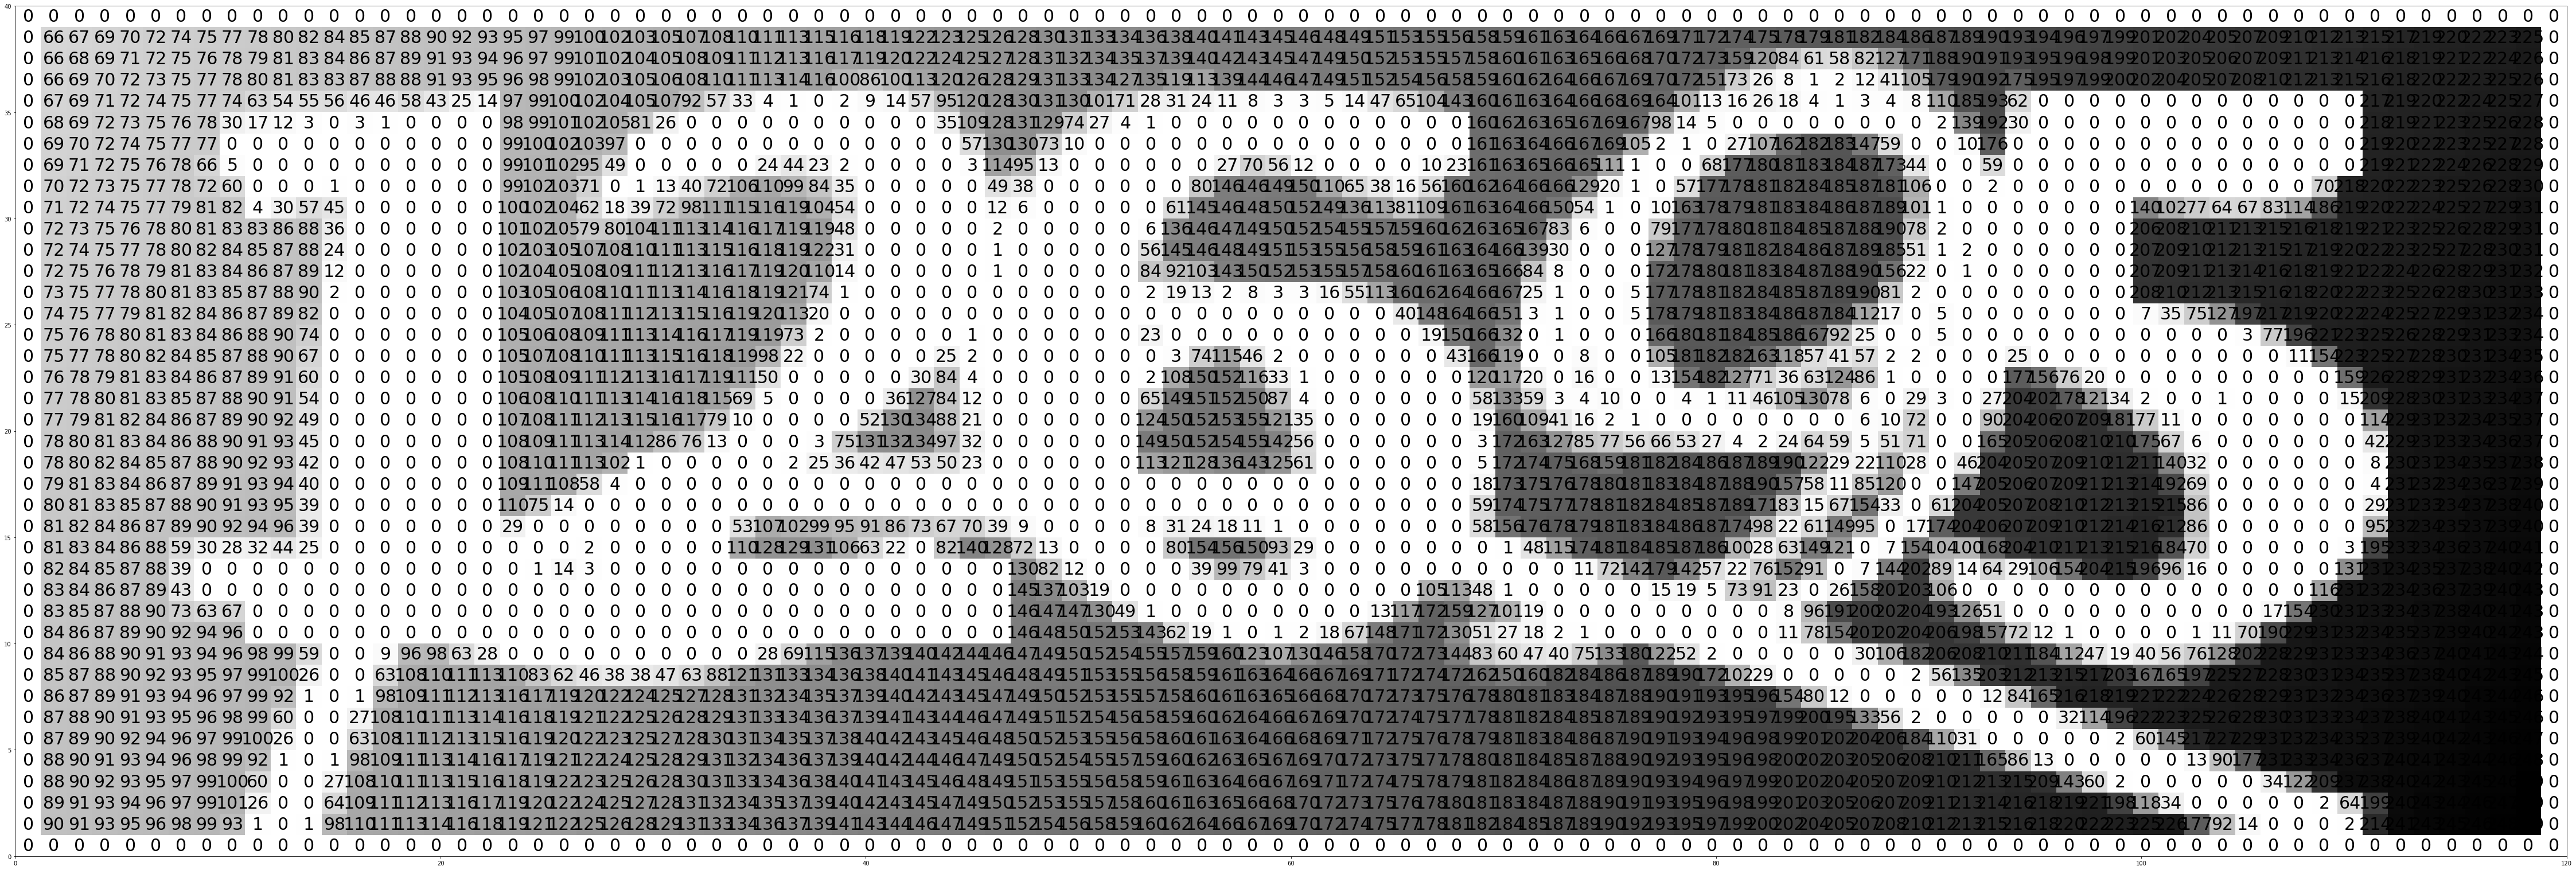

In [29]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

index = 5
image_grayscale = img[:,:,1]
image_grayscale = np.flip(image_grayscale,axis=0)

width = 100
heigth = 40
data = image_grayscale
print(data.shape)

# Limits for the extent
x_start = 0
x_end = 120
y_start = 0
y_end = 40

extent = [x_start, x_end, y_start, y_end]

# The normal figure
fig = plt.figure(figsize=(16*5, 12*5))

ax2 = fig.add_subplot(211)
im = ax2.imshow(data, extent=extent, origin='lower', interpolation='None', cmap='Greys')

# Add the text
jump_x = (x_end - x_start) / (2.0 * width)
jump_y = (y_end - y_start) / (2.0 * heigth)
x_positions = np.linspace(start=x_start, stop=x_end, num=width, endpoint=False)
y_positions = np.linspace(start=y_start, stop=y_end, num=heigth, endpoint=False)

for y_index, y in enumerate(y_positions):
    for x_index, x in enumerate(x_positions):
        label = data[y_index, x_index]
        text_x = x + jump_x
        text_y = y + jump_y
        ax2.text(text_x, text_y, label, color='black', ha='center', va='center',size = 30)
plt.show()

In [25]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

index = 5
image_grayscale = img[:,:,2]
image_grayscale = np.flip(image_grayscale,axis=0)

width = 120
heigth = 40
data = image_grayscale
print(data.shape)

# Limits for the extent
x_start = 0
x_end = 120
y_start = 0
y_end = 40

extent = [x_start, x_end, y_start, y_end]

# The normal figure
fig = plt.figure(figsize=(16*5, 12*5))

ax2 = fig.add_subplot(211)
im = ax2.imshow(data, extent=extent, origin='lower', interpolation='None', cmap='Greys')

# Add the text
jump_x = (x_end - x_start) / (2.0 * width)
jump_y = (y_end - y_start) / (2.0 * heigth)
x_positions = np.linspace(start=x_start, stop=x_end, num=width, endpoint=False)
y_positions = np.linspace(start=y_start, stop=y_end, num=heigth, endpoint=False)

for y_index, y in enumerate(y_positions):
    for x_index, x in enumerate(x_positions):
        label = data[y_index, x_index]
        text_x = x + jump_x
        text_y = y + jump_y
        ax2.text(text_x, text_y, label, color='black', ha='center', va='center',size = 30)
plt.show()

IndexError: too many indices for array

In [23]:
img = cv2.imread('captcha.png',cv2.IMREAD_UNCHANGED)
print(img.shape)

(40, 100, 3)


In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

index = 5
image_grayscale = img[:,:,2]
image_grayscale = np.flip(image_grayscale,axis=0)

width = 120
heigth = 40
data = image_grayscale
print(data.shape)

# Limits for the extent
x_start = 0
x_end = 120
y_start = 0
y_end = 40

extent = [x_start, x_end, y_start, y_end]

# The normal figure
fig = plt.figure(figsize=(16*5, 12*5))

ax2 = fig.add_subplot(211)
im = ax2.imshow(data, extent=extent, origin='lower', interpolation='None', cmap='Greys')

# Add the text
jump_x = (x_end - x_start) / (2.0 * width)
jump_y = (y_end - y_start) / (2.0 * heigth)
x_positions = np.linspace(start=x_start, stop=x_end, num=width, endpoint=False)
y_positions = np.linspace(start=y_start, stop=y_end, num=heigth, endpoint=False)

for y_index, y in enumerate(y_positions):
    for x_index, x in enumerate(x_positions):
        label = data[y_index, x_index]
        text_x = x + jump_x
        text_y = y + jump_y
        ax2.text(text_x, text_y, label, color='black', ha='center', va='center',size = 30)
plt.show()